# Title: Predict Quality of Wine

## Introduction: 
Oxygen -> Oxidize -> Wine lose its fruit aromas
Sulphur dioxide ->Antiseptic -> Prevent wine losing fruit aromas
- Based on the pH and the total sulphur dioxide predict the quality of the wine.
- Variables to use:
    - pH
    - Total sulfur dioxide
    - alcohol
    - Quality
- Dataset to use: https://www.kaggle.com/yasserh/wine-quality-dataset
- Relevant study: https://www.sciencedirect.com/science/article/pii/S0167923609001377?via=ihub


## Preliminary exploratory data analysis:

In [11]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

In [12]:
wine_data <- read_csv('data/WineQT.csv') 
colnames(wine_data) <- make.names(colnames(wine_data))

wine_data_clean <- wine_data %>%
select(total.sulfur.dioxide, pH, alcohol, quality)

wine_data_clean

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



total.sulfur.dioxide,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>
34,3.51,9.4,5
67,3.20,9.8,5
54,3.26,9.8,5
60,3.16,9.8,6
34,3.51,9.4,5
40,3.51,9.4,5
59,3.30,9.4,5
21,3.39,10.0,7
18,3.36,9.5,7


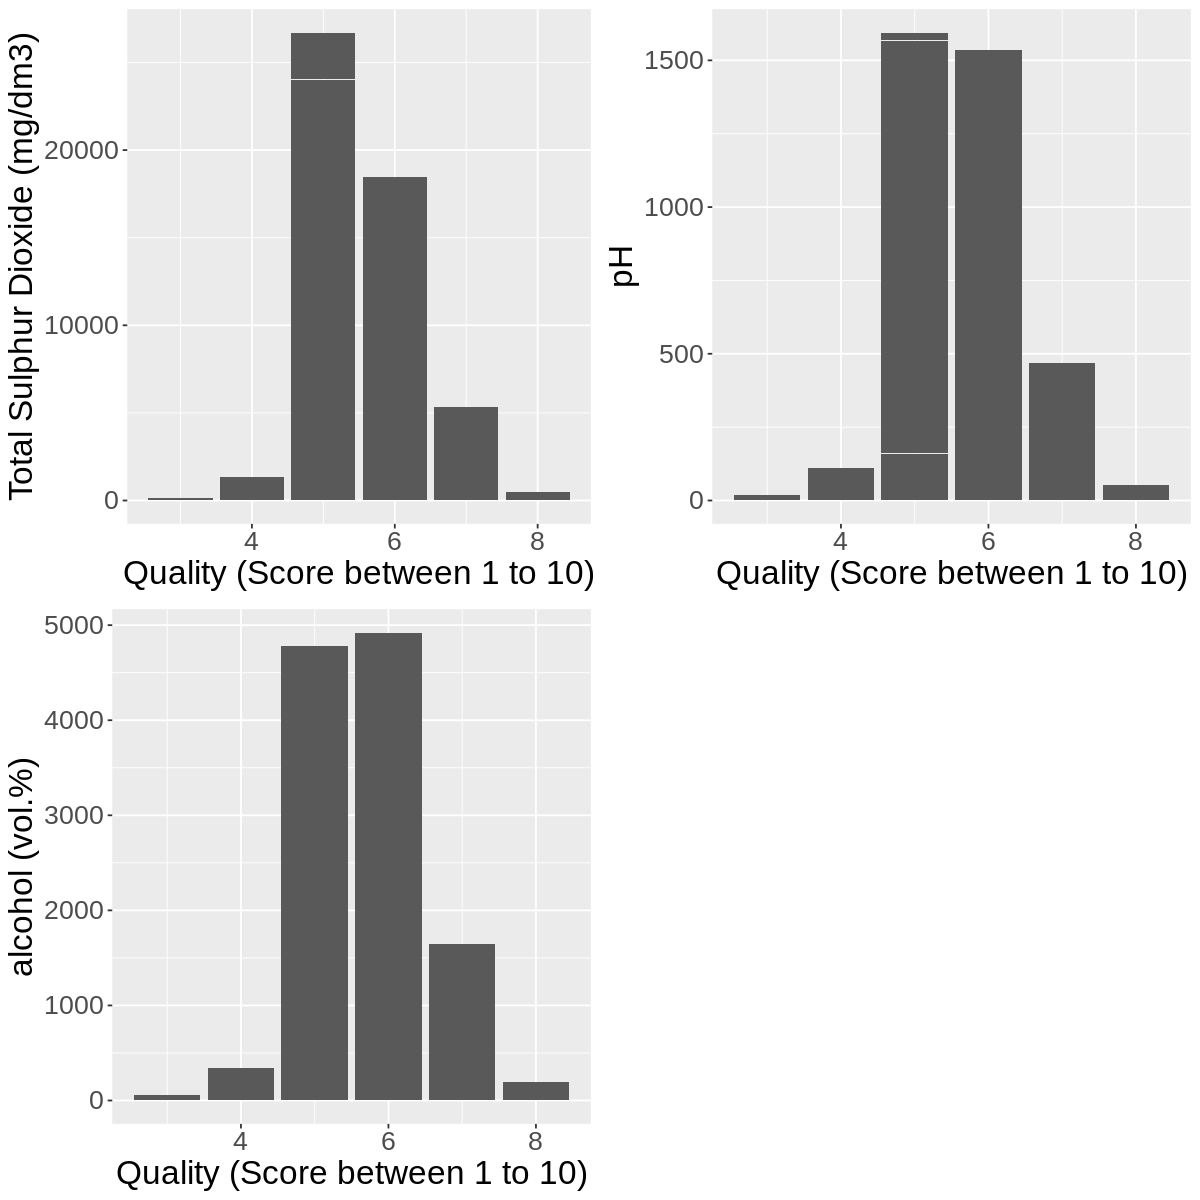

In [13]:
options(repr.plot.width = 10, repr.plot.height = 10)

wine_plot_so2 <- wine_data_clean %>%
    ggplot(aes(x = quality,
               y = total.sulfur.dioxide)) +
    geom_bar(stat = 'identity')+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Total Sulphur Dioxide (mg/dm3)') +
    theme(text = element_text(size = 20))

wine_plot_pH <- wine_data_clean %>%
    ggplot(aes(x = quality,
               y = pH)) +
    geom_bar(stat = 'identity')+
    xlab('Quality (Score between 1 to 10)') + 
    ylab ('pH') +
    theme(text = element_text(size = 20))

wine_plot_alcohol <- wine_data_clean %>%
    ggplot(aes(x = quality,
               y = alcohol)) +
    geom_bar(stat = 'identity')+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('alcohol (vol.%)') +
    theme(text = element_text(size = 20))

plot_grid(wine_plot_so2, wine_plot_pH, wine_plot_alcohol)

### Methods:

### Expected outcome:

To predict the quality of wine based on the given pH, the amount of sulphur dioxide, and the amount of alcohol. 